In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import matplotlib.animation as anim
from IPython.display import HTML

In [2]:
#Constantes
G = 6.67E-11
M_T = 5.9736E24
R_T = 6.3781E6
M_L = 0.07349E24
R_L = 1.7374E6
d = 3.844E8
w = 2.6617E-6

In [3]:
def f0(t, rgorro, phi, pr, pphi ): #v_tangencial
    return pr

def f1(t, rgorro, phi, pr, pphi ): #v_angular
    return pphi/rgorro**2

def f2(t, rgorro, phi, pr, pphi ): #derivada momentum lineal
    rr = np.sqrt(1 + rgorro**2 -2*rgorro*np.cos(phi-w*t))
    return ((pphi**2)/(rgorro**3) - (G*M_T/d**3)*((1/rgorro**2) + M_L*(rgorro-np.cos(phi-w*t))/(M_T*rr**3)))

def f3 (t, rgorro, phi, pr, pphi ): #derivada momentum lineal
    rr = np.sqrt(1 + rgorro**2 -2*rgorro*np.cos(phi-w*t))
    return -(G*M_L*rgorro*np.sin(phi-w*t))/((rr*d)**3)

In [4]:
#parámetros en t = 0

phi0 = 0
theta0 = 25*np.pi/180
escp_vel = 11100
R0 = np.array([R_T, R_T])
V0 = np.array([escp_vel*np.cos(theta0), escp_vel*np.sin(theta0)])

In [5]:
#vectorizo mis funciones
f = np.array([f0,f1,f2,f3])

In [6]:
#Discretización temporal para 2 semanas

T = 604800*2
h = 5 #pasos de 5 segundos
t = np.linspace(0, T, int(T/h))

In [7]:
def R4(f, R0, t, h): #entrará como parámetros mi vector de funciones, condiciones iniciales, arreglo temporal y el paso definido  como h
    h = 5  
    y = np.zeros([len(t), 4])
    y[0] = R0 

    
    K1 = np.zeros([4])
    K2 = np.zeros([4])
    K3 = np.zeros([4])
    K4 = np.zeros([4])
    
        
    for i in tqdm(range(1,len(t))):
          for j in range(len(f)):
              K1[j] = f[j](t[i-1], y[i-1][0], y[i-1][1], y[i-1][2], y[i-1][3])
          for j in range(len(f)):
              K2[j] = f[j](t[i-1] + 0.5*h, y[i-1][0] + 0.5*K1[0]*h, y[i-1][1] + 0.5*K1[1]*h, y[i-1][2] + 0.5*K1[2]*h, y[i-1][3] + 0.5*K1[3]*h)
          for j in range(len(f)):
              K3[j] = f[j](t[i-1] + 0.5*h, y[i-1][0] + 0.5*K2[0]*h, y[i-1][1] + 0.5*K2[1]*h, y[i-1][2] + 0.5*K2[2]*h, y[i-1][3] + 0.5*K2[3]*h)
          for j in range(len(f)):
              K4[j] = f[j](t[i-1] + h, y[i-1][0] + K3[0]*h, y[i-1][1] + K3[1]*h, y[i-1][2] + K3[2]*h, y[i-1][3] + K3[3]*h)
          for j in range(len(f)):
              y[i][j] = y[i-1][j] + h*(K1[j] + 2*K2[j] + 2*K3[j] + K4[j])/6

    
    return y

In [8]:
#Condiciones iniciales
p0 = R_T/d
v = escp_vel/d
pr0 = v*np.cos(theta0-phi0)
pphi0 = R_T*v*np.sin(theta0-phi0)/d
R0 = (p0, phi0, pr0, pphi0)

In [9]:
Datos = R4(f, R0, t, h)

100%|██████████| 241919/241919 [00:34<00:00, 7029.25it/s]


In [10]:
#Para graficar se pasarán los datos a coordendas cartesianas

Data_X = np.zeros(len(Datos))
Data_Y = np.zeros(len(Datos))
Data_phi = np.zeros(len(Datos))

In [11]:
for i in range(len(Datos)):
    Data_X[i] = Datos[i][0]*np.cos(Datos[i][1])
    Data_Y[i] = Datos[i][0]*np.sin(Datos[i][1])
    Data_phi[i] = Datos[i][1]

x_moon = np.cos(w*t)
y_moon = np.sin(w*t)

xt = 0
yt = 0

In [12]:
def Reduce_factor(t,xdata,ydata,xm,ym, factor):
  
    New_time = []
    New_xdata = []
    New_ydata = []
    New_xm = []
    New_ym = []
    
    for i in range(len(t)):
        if i%factor == 0:
            New_time.append(t[i])
            New_xdata.append(xdata[i])
            New_ydata.append(ydata[i])
            New_xm.append(xm[i])
            New_ym.append(ym[i])
            
    return np.array(New_time), np.array(New_xdata), np.array(New_ydata), np.array(New_xm), np.array(New_ym)

In [15]:
nt, nxdata, nydata, nxm, nym = Reduce_factor(t,Data_X, Data_Y, x_moon, y_moon, 1000)
#Se redujo en un factor de 1000 como fue sugerido en el enunciado

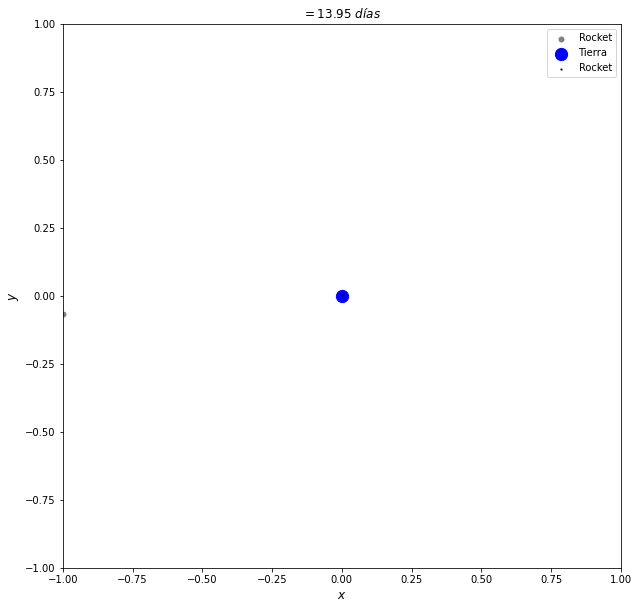

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
    
def init():
    ax.set_xlabel(r'$x$',fontsize=12)
    ax.set_ylabel(r'$y$',fontsize=12)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)

colors = ['grey','blue','black']    
sizes = [100, 600, 5]
Labels = ['Luna','Tierra','Rocket']

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$ =%.2f \ días$' %(nt[i]/86400))   
    plot = ax.scatter(nxm[i],nym[i], marker='.',color=colors[0],s=sizes[0], label=Labels[2]) #luna     
    plot = ax.scatter(xt,yt, marker='.',color=colors[1],s=sizes[1], label=Labels[1]) #tierra
    plot = ax.scatter(nxdata[i],nydata[i], marker='.',color=colors[2],s=sizes[2], label=Labels[2]) #cohete
    
    plot = ax.legend()
            
    return plot
    
anim = anim.FuncAnimation(fig,Update,frames=len(nt),init_func=init)

Luego de probar diferentes ángulos $\theta$ el que mejor cumplía las condiciones era $\theta = 25°$